# MNIST BaseModel 2

This is the same as the previous avergaing model. But this is for the numbers and `3` and `8`. 

They are very similar. With that, we can really check the performance on this basemodel.

In [1]:
from fastai2.vision.all import *
from utils import *

## Inspecting the Dataset

In [2]:
images_path = untar_data(URLs.MNIST)

In [3]:
images_path.ls()

(#2) [Path('/storage/data/mnist_png/training'),Path('/storage/data/mnist_png/testing')]

In [4]:
(images_path/"training").ls()

(#10) [Path('/storage/data/mnist_png/training/0'),Path('/storage/data/mnist_png/training/2'),Path('/storage/data/mnist_png/training/9'),Path('/storage/data/mnist_png/training/8'),Path('/storage/data/mnist_png/training/7'),Path('/storage/data/mnist_png/training/1'),Path('/storage/data/mnist_png/training/5'),Path('/storage/data/mnist_png/training/4'),Path('/storage/data/mnist_png/training/6'),Path('/storage/data/mnist_png/training/3')]

In [5]:
(images_path/"training"/"3").ls()

(#6131) [Path('/storage/data/mnist_png/training/3/26208.png'),Path('/storage/data/mnist_png/training/3/12882.png'),Path('/storage/data/mnist_png/training/3/58219.png'),Path('/storage/data/mnist_png/training/3/13242.png'),Path('/storage/data/mnist_png/training/3/53225.png'),Path('/storage/data/mnist_png/training/3/51947.png'),Path('/storage/data/mnist_png/training/3/57974.png'),Path('/storage/data/mnist_png/training/3/9812.png'),Path('/storage/data/mnist_png/training/3/6658.png'),Path('/storage/data/mnist_png/training/3/11285.png')...]

In [6]:
(images_path/"training"/"8").ls()

(#5851) [Path('/storage/data/mnist_png/training/8/2063.png'),Path('/storage/data/mnist_png/training/8/43072.png'),Path('/storage/data/mnist_png/training/8/52884.png'),Path('/storage/data/mnist_png/training/8/49831.png'),Path('/storage/data/mnist_png/training/8/48037.png'),Path('/storage/data/mnist_png/training/8/38044.png'),Path('/storage/data/mnist_png/training/8/12886.png'),Path('/storage/data/mnist_png/training/8/10655.png'),Path('/storage/data/mnist_png/training/8/10079.png'),Path('/storage/data/mnist_png/training/8/45027.png')...]

## Creating Mean Images

In [7]:
tsr_train_threes = torch.stack([tensor(Image.open(im)) for im in (images_path/"training"/"3").ls()]).float()/255
tsr_train_eights = torch.stack([tensor(Image.open(im)) for im in (images_path/"training"/"8").ls()]).float()/255

In [8]:
tsr_train_threes.shape, tsr_train_eights.shape

(torch.Size([6131, 28, 28]), torch.Size([5851, 28, 28]))

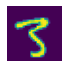

In [9]:
show_image(tsr_train_threes[0])

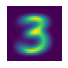

In [10]:
tsr_mean_threes = tsr_train_threes.mean(0)
show_image(tsr_mean_threes)

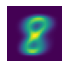

In [11]:
tsr_mean_eights = tsr_train_eights.mean(0)
show_image(tsr_mean_eights)

## Finding Accuracy

In [12]:
tsr_valid_threes = torch.stack([tensor(Image.open(im)) for im in (images_path/"testing"/"3").ls()]).float() / 255
tsr_valid_eights = torch.stack([tensor(Image.open(im)) for im in (images_path/"testing"/"8").ls()]).float() / 255

In [15]:
tsr_valid_eights.shape, tsr_valid_eights.shape

(torch.Size([974, 28, 28]), torch.Size([974, 28, 28]))

In [24]:
def find_accuracy(tsr_input, expected_is_three):
    loss_threes = ((tsr_input - tsr_mean_threes) ** 2).mean((1, 2)).sqrt()
    loss_eights = ((tsr_input - tsr_mean_eights) ** 2).mean((1, 2)).sqrt()
    
    is_three = loss_threes < loss_eights
    accuracy = (torch.sum(is_three == expected_is_three)).float()/len(is_three) * 100
    return accuracy

In [27]:
acc_threes = find_accuracy(tsr_valid_threes, True)
acc_eights = find_accuracy(tsr_valid_eights, False)

acc_threes, acc_eights

(tensor(90.7921), tensor(87.9877))

In [29]:
acc_overall = (acc_threes + acc_eights) /2 
acc_overall

tensor(89.3899)

## Conclusion

Earlier with 3 and 7 we got accuracy around 95%. But now, it's around 89%.

So, this mean base model gets worst due to the similarity of numbers.